<div style="float:left">
    <h1 style="width:600px">Lecture 6: Code for CART visualisation</h1>
    <h3 style="width:600px">CASA0006: Data Science for Spatial Systems</h3>
    <h3 style="width:600px">CASA0009: Spatial Data Capture, Storage and Analysis</h3>
    <h3 style="width:600px">Author: Huanfa Chen</h3>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-03-21 14:04:43


This notebooks contains visualisation of CART (Classification and Regression Tree) on the bike rental data. The code and visualisations are mainly used for teaching.

Note that these visualisations may not work well or be interpretable for a deep CART or a complicated dataset.

In [2]:
# import package
from sklearn.tree import DecisionTreeRegressor
import numpy.random as rnd
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
# load data
df_bike_rental = pd.read_csv('daily_count_bike_rental.csv')

In [5]:
df_bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cnt              731 non-null    int64  
 1   season           731 non-null    object 
 2   yr               731 non-null    int64  
 3   mnth             731 non-null    object 
 4   holiday          731 non-null    object 
 5   weekday          731 non-null    object 
 6   workingday       731 non-null    object 
 7   weathersit       731 non-null    object 
 8   temp             731 non-null    float64
 9   hum              731 non-null    float64
 10  windspeed        731 non-null    float64
 11  days_since_2011  731 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 68.7+ KB


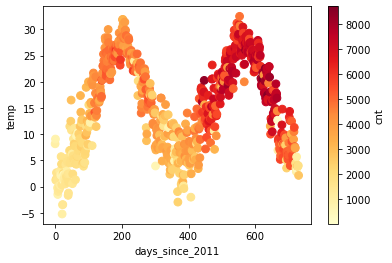

In [6]:
# plot

fig, ax = plt.subplots()
df_bike_rental.plot(kind='scatter', x='days_since_2011', y='temp', s=60, c='cnt', cmap='YlOrRd', ax=ax) 

# df_bike_rental.plot.scatter(x='days_since_2011', y='temp', c='cnt')
# plt.figure(figsize=(11, 4))
plt.savefig("scatter_plot_bike.jpg")

In [7]:
!ls

Lecture_6_Advanced_Regression_CART_visualisation.ipynb	scatter_plot_bike.jpg
daily_count_bike_rental.csv


In [8]:
y = df_bike_rental.cnt
x = df_bike_rental[['days_since_2011', 'temp']]

In [9]:
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, y) #uses Iris data 

DecisionTreeRegressor(max_depth=2)

In [13]:
# This saves the dot file as a local file
export_graphviz(tree_reg, 
                out_file = './bike_rental_tree.dot', 
                feature_names = ['days_since_2011', 'temp'], 
                class_names = ['rental_cnt'], 
                rounded = True, 
                filled = True)

In [14]:
# Using dot command to transform the dot file into a png
# If you get an error of 'dot not found', then installed it using the following commands (it works on Ubuntu Linux):
# ! sudo apt update
# ! sudo apt-get install graphviz
! dot -Tpng ./bike_rental_tree.dot -o ./bike_rental_tree.png

/bin/bash: dot: command not found


![](bike_rental_tree.png)

In [15]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], xlabel=r"$x_1$", ylabel=r"$x_2$", iris=True, legend=False, plot_training=True, plot_true_value = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if plot_true_value:
        plt.scatter(X[:,0], X[:,1], s=60, c=y, cmap='YlOrRd')
        plt.axis(axes)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [16]:
x.days_since_2011.max()

730

In [17]:
x.days_since_2011.min()

0

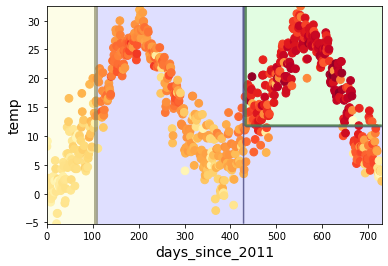

In [18]:
plot_decision_boundary(tree_reg, x.to_numpy(), y, axes=[x.days_since_2011.min(), x.days_since_2011.max(), x.temp.min(), x.temp.max()], iris=False, plot_training=False, xlabel='days_since_2011', ylabel='temp')
plt.savefig("CART_bike_rental.jpg")
# df_bike_rental.plot(kind='scatter', x='days_since_2011', y='temp', s=60, c='cnt', cmap='YlOrRd', ax=ax) 

### Acknowledgements

This workshop is partially based on a [chapter](https://christophm.github.io/interpretable-ml-book/limo.html) of the [book](https://christophm.github.io/interpretable-ml-book/) by Christoph Molnar. 

Some codes are from [this tutorial](https://colab.research.google.com/drive/1P9IoqXN9dbjJ3TN50wa8wwDdvn9P6hX7#scrollTo=ULTLcHsjEq-9) which is part of **SPCE0038 Machine Learning with Big Data** from UCL.